# <center>Predict the different species of flowers</center>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
path = r"C:\Users\lenovo\Downloads\archive (8)\Iris.csv"
df_raw = pd.read_csv(path)

In [3]:
display(df_raw.head(0))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [4]:
display(df_raw.head(1))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa


In [5]:
# If the data is malformatted as a single column, split it into multiple columns
if len(df_raw.columns) == 1:
    split_col = df_raw.columns[0]
    df = df_raw[split_col].str.split(',', expand=True)
    
    headers = ['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
    
    df.columns = headers
else:
    df = df_raw

# Convert all values to float for further analysis
#df = df.apply(pd.to_numeric, errors='coerce')  # This will convert strings to NaN if they can't be changed to numbers

display(df.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
display(df.tail())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
for col in df.columns:
    sum_unique = df[col].unique().sum()
    print(f"Sum of unique values in {col}: {sum_unique}")


Sum of unique values in Id: 11325
Sum of unique values in SepalLengthCm: 210.39999999999998
Sum of unique values in SepalWidthCm: 73.6
Sum of unique values in PetalLengthCm: 181.5
Sum of unique values in PetalWidthCm: 30.099999999999998
Sum of unique values in Species: Iris-setosaIris-versicolorIris-virginica


In [8]:
from sklearn.preprocessing import LabelEncoder

# Assuming you've already read the data into the dataframe 'df'

# Using LabelEncoder for 'Species' column
label_enc = LabelEncoder()
df['Species'] = label_enc.fit_transform(df['Species'])

# Converting other columns (if they are not in a numeric format)
for column in ['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

display(df.head())


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [9]:
display(df.tail())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [10]:
print("Shape of Dataset:", df.shape)
print(df.isnull().sum())


Shape of Dataset: (150, 6)
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB
None


In [12]:
display(df['Species'].value_counts())

0    50
1    50
2    50
Name: Species, dtype: int64

In [13]:
display(df.describe())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


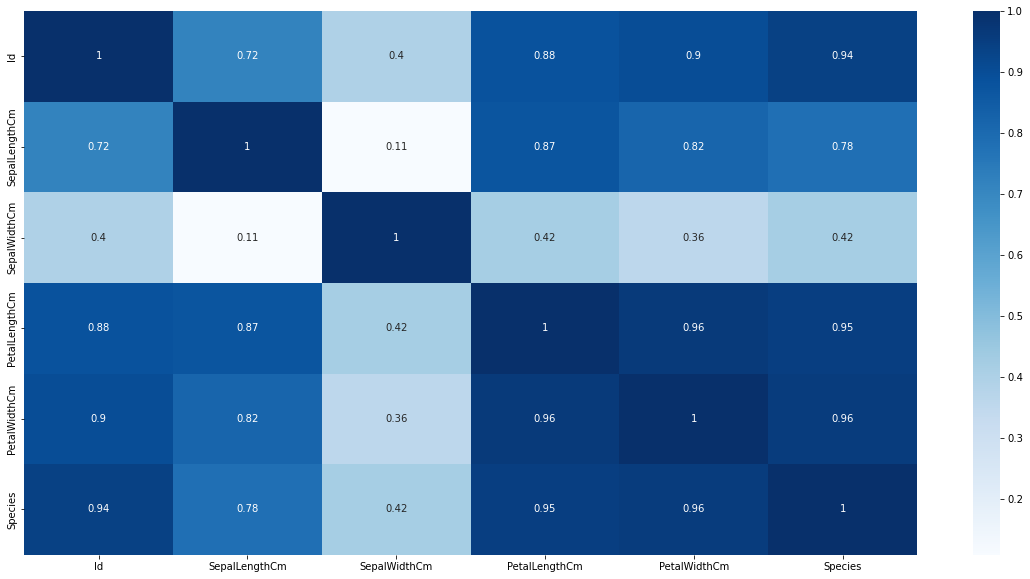

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(), annot=True, cmap='Blues')
plt.show()


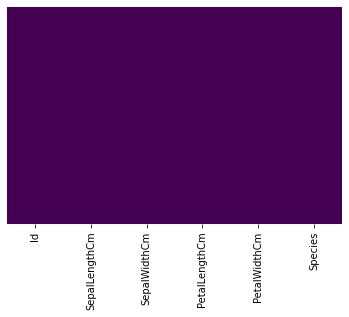

In [15]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

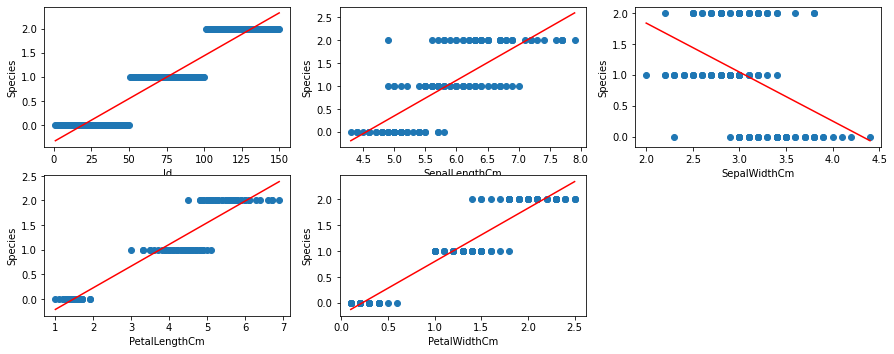

In [16]:
plt.figure(figsize=(15, 15))

for i, idx in enumerate(df.columns[0:5]):
    plt.subplot(5, 3, i+1)
    x = df[idx]
    y = df['Species']
    plt.plot(x, y, 'o')
    

    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
    plt.xlabel(idx)
    plt.ylabel('Species')    

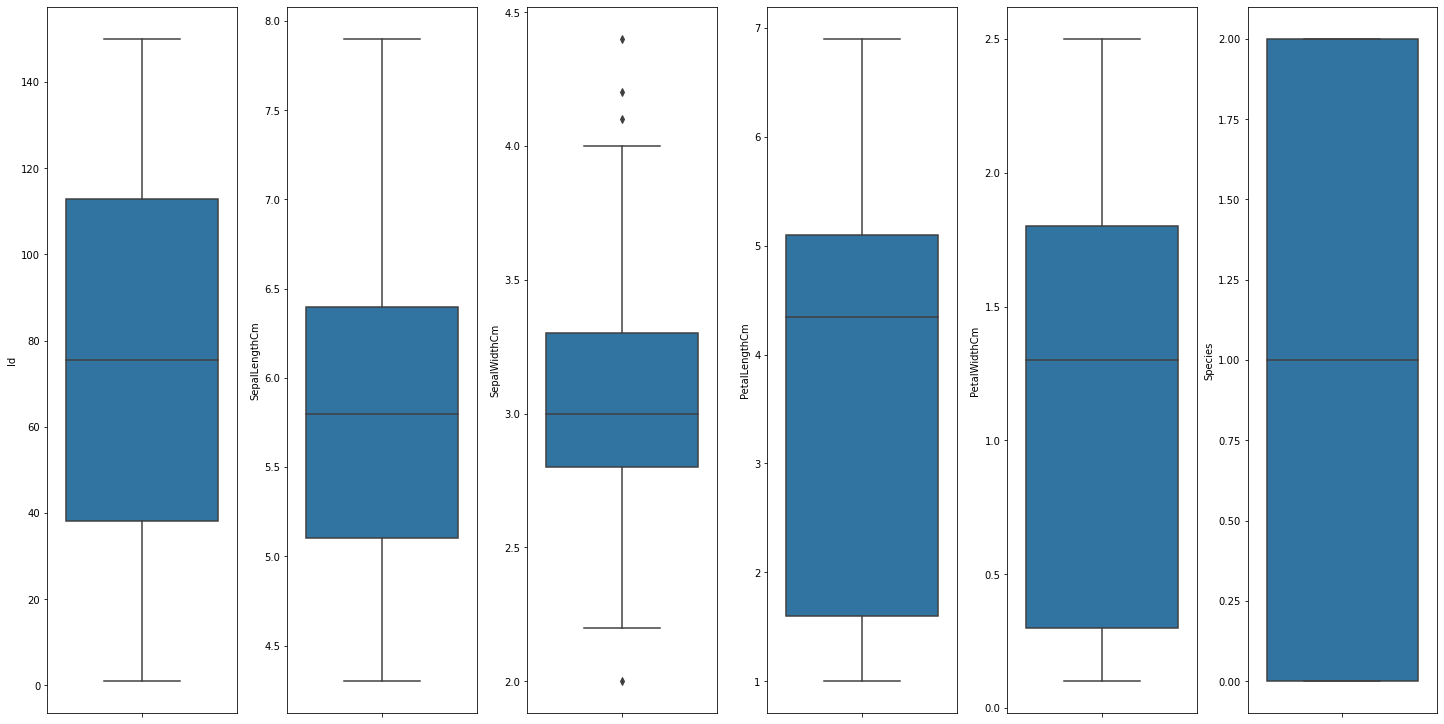

In [17]:

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


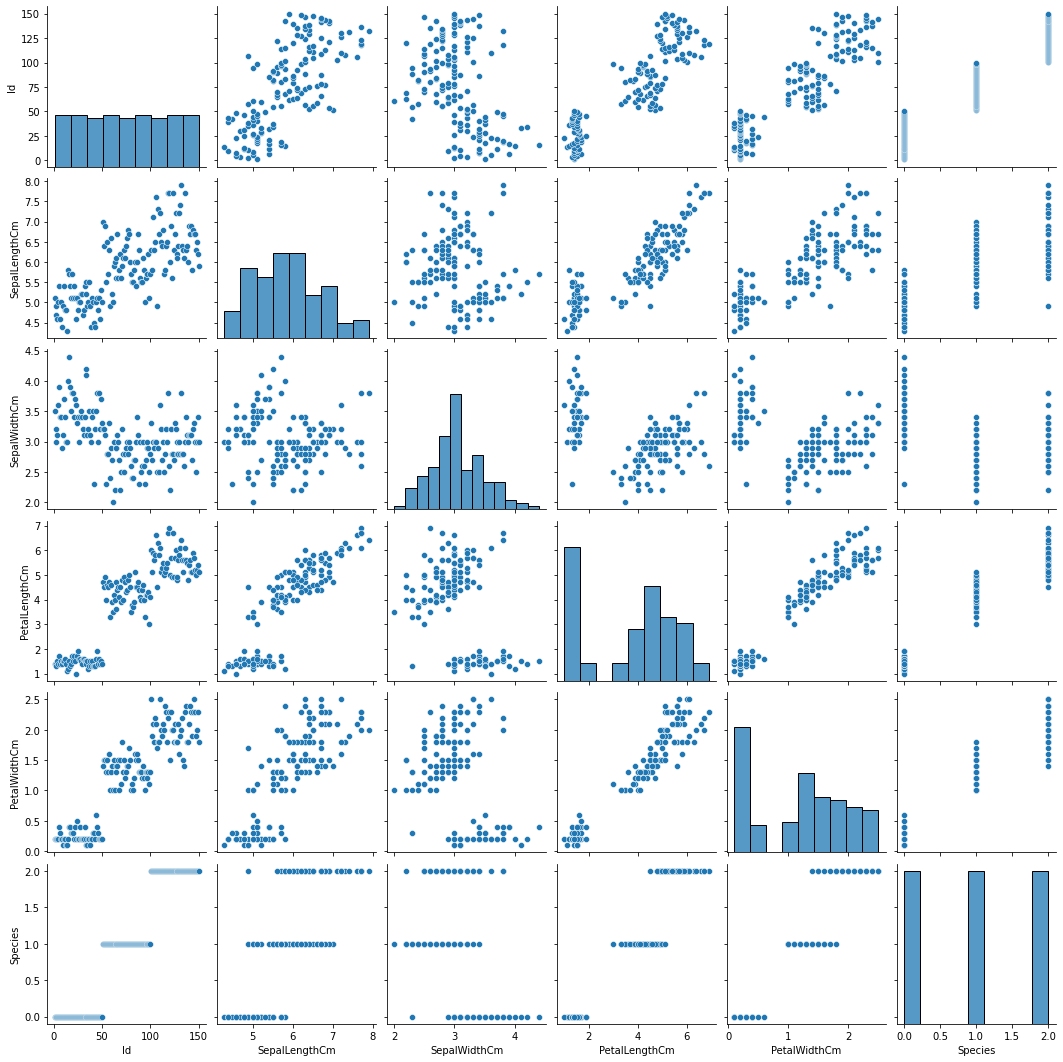

In [18]:
#visualization
sns.pairplot(df)
plt.show()

In [19]:
x = df.iloc[:, 0:5]
y = df.iloc[:, -1]
display(x)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [20]:
display(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Training Shape: ', x_train.shape)
print('Testing Shape: ', x_test.shape)

Training Shape:  (120, 5)
Testing Shape:  (30, 5)


In [22]:
regression_model = LinearRegression()

regression_model.fit(x_train, y_train)

LinearRegression()

In [23]:
import numpy as np

y_predict = regression_model.predict(x_test)
y_predict_rounded = np.round(y_predict)

sum = 0
for i, n in enumerate(y_test):
    if n == y_predict[i]:
        sum += 1

correct_predictions = np.sum(y_test == y_predict_rounded)
accuracy = correct_predictions / len(y_test)
print(accuracy)


1.0


In [24]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ', model.score(x_train, y_train)*100)
print('Testing Accuracy: ', model.score(x_test, y_test)*100)
print('Model Accuracy: ', r2_score(y, model.predict(x))*100)


Training Accuracy:  95.35938138045185
Testing Accuracy:  97.3191842134439
Model Accuracy:  95.77222029886066


In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)


In [26]:
#linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

#Prediction
prediction=regressor.predict(x_test)
prediction1=pd.DataFrame(prediction)
display(prediction1)

,0
0,1.137436
1,-0.057264
2,2.120840
3,1.245462
4,1.214586
5,0.070629
6,0.954219
7,2.020655
8,1.197133
9,1.096522


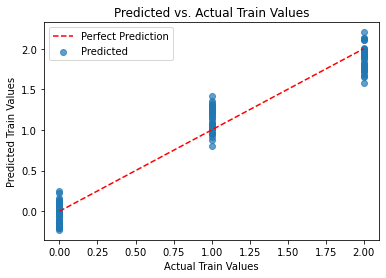

In [27]:
# Plotting the linear regression line for training data
plt.scatter(y_train, y_train_pred, alpha=0.7, label='Predicted')

# Plotting the line for perfect prediction
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel('Actual Train Values')
plt.ylabel('Predicted Train Values')
plt.title('Predicted vs. Actual Train Values')
plt.legend()

plt.show()


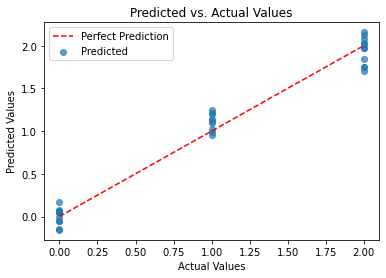

In [28]:
y_test_pred = model.predict(x_test)

# Plotting the linear regression line
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Predicted')

# Plotting the line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()

plt.show()


use another algorithm to increase accuracy

Training Accuracy:  100.0
Testing Accuracy:  100.0
Model Accuracy:  100.0


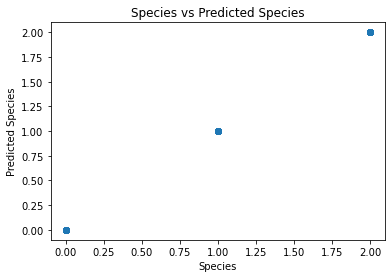

In [29]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ',model.score(x_train, y_train)*100)

from sklearn.metrics import r2_score

print('Testing Accuracy: ',model.score(x_test, y_test)*100)
print('Model Accuracy: ',r2_score(y, model.predict(x))*100)

plt.scatter(y_train,y_pred)
plt.xlabel("Species")
plt.ylabel("Predicted Species")
plt.title("Species vs Predicted Species")
plt.show()

Training Accuracy:  99.86530224707248
Testing Accuracy:  100.0
Model Accuracy:  99.8936


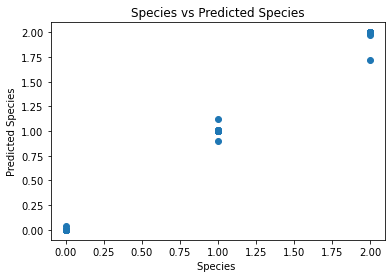

In [30]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ',model.score(x_train, y_train)*100)

from sklearn.metrics import r2_score

print('Testing Accuracy: ',model.score(x_test, y_test)*100)
print('Model Accuracy: ',r2_score(y, model.predict(x))*100)

plt.scatter(y_train,y_pred)
plt.xlabel("Species ")
plt.ylabel("Predicted Species")
plt.title("Species vs Predicted Species")
plt.show()

In [31]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Training Accuracy:  99.99999891877592
Testing Accuracy:  99.99999891337565
Model Accuracy:  99.99999891809416


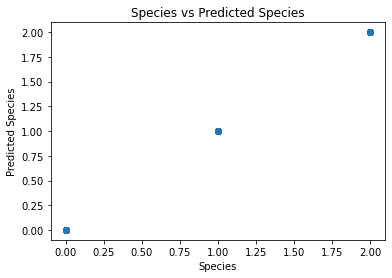

In [32]:

import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ',model.score(x_train, y_train)*100)

from sklearn.metrics import r2_score

print('Testing Accuracy: ',model.score(x_test, y_test)*100)
print('Model Accuracy: ',r2_score(y, model.predict(x))*100)

plt.scatter(y_train,y_pred)
plt.xlabel("Species")
plt.ylabel("Predicted Species")
plt.title("Species vs Predicted Species")
plt.show()

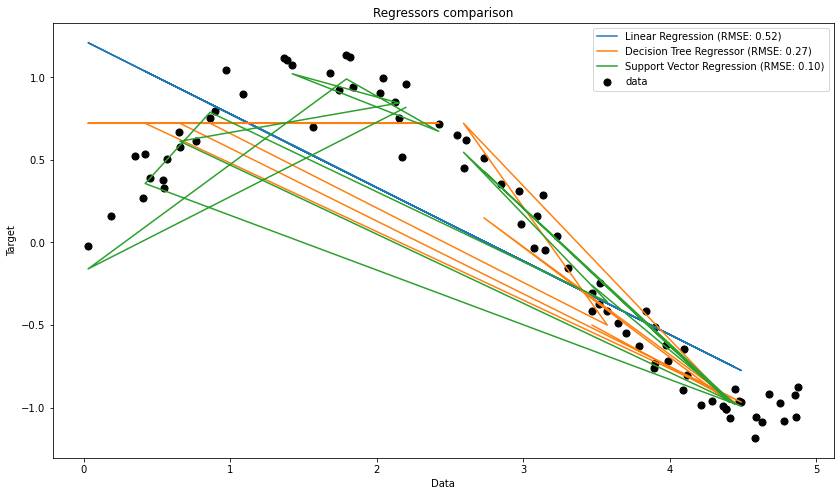

In [33]:
# Generating sample data
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# Splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=2),
    'Support Vector Regression': SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
}

# Plotting
plt.figure(figsize=(14, 8))
plt.scatter(X, y, s=50, c="black", label="data")

for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    label = f"{name} (RMSE: {rmse:.2f})"
    plt.plot(X_test, y_pred, label=label)

plt.xlabel("Data")
plt.ylabel("Target")
plt.title("Regressors comparison")
plt.legend()
plt.show()


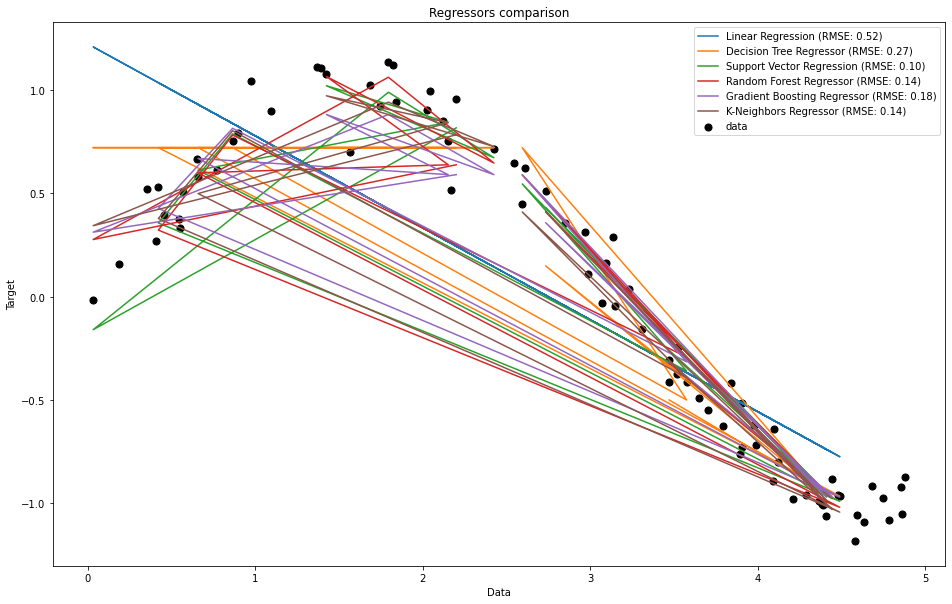

In [34]:
  # Initialize models
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=2),
    'Support Vector Regression': SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42),
    'K-Neighbors Regressor': KNeighborsRegressor(n_neighbors=5)
}

# Plotting
plt.figure(figsize=(16, 10))
plt.scatter(X, y, s=50, c="black", label="data")

for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    label = f"{name} (RMSE: {rmse:.2f})"
    plt.plot(X_test, y_pred, label=label)

plt.xlabel("Data")
plt.ylabel("Target")
plt.title("Regressors comparison")
plt.legend()
plt.show()
